<a href="https://colab.research.google.com/github/Mr-Slippery/aifractals/blob/main/load_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0DD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0990>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0210>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D01D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D02D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0350>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0090>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D04D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0D50>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31D0AD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2000x2000 at 0x7F50F31E7E10>]


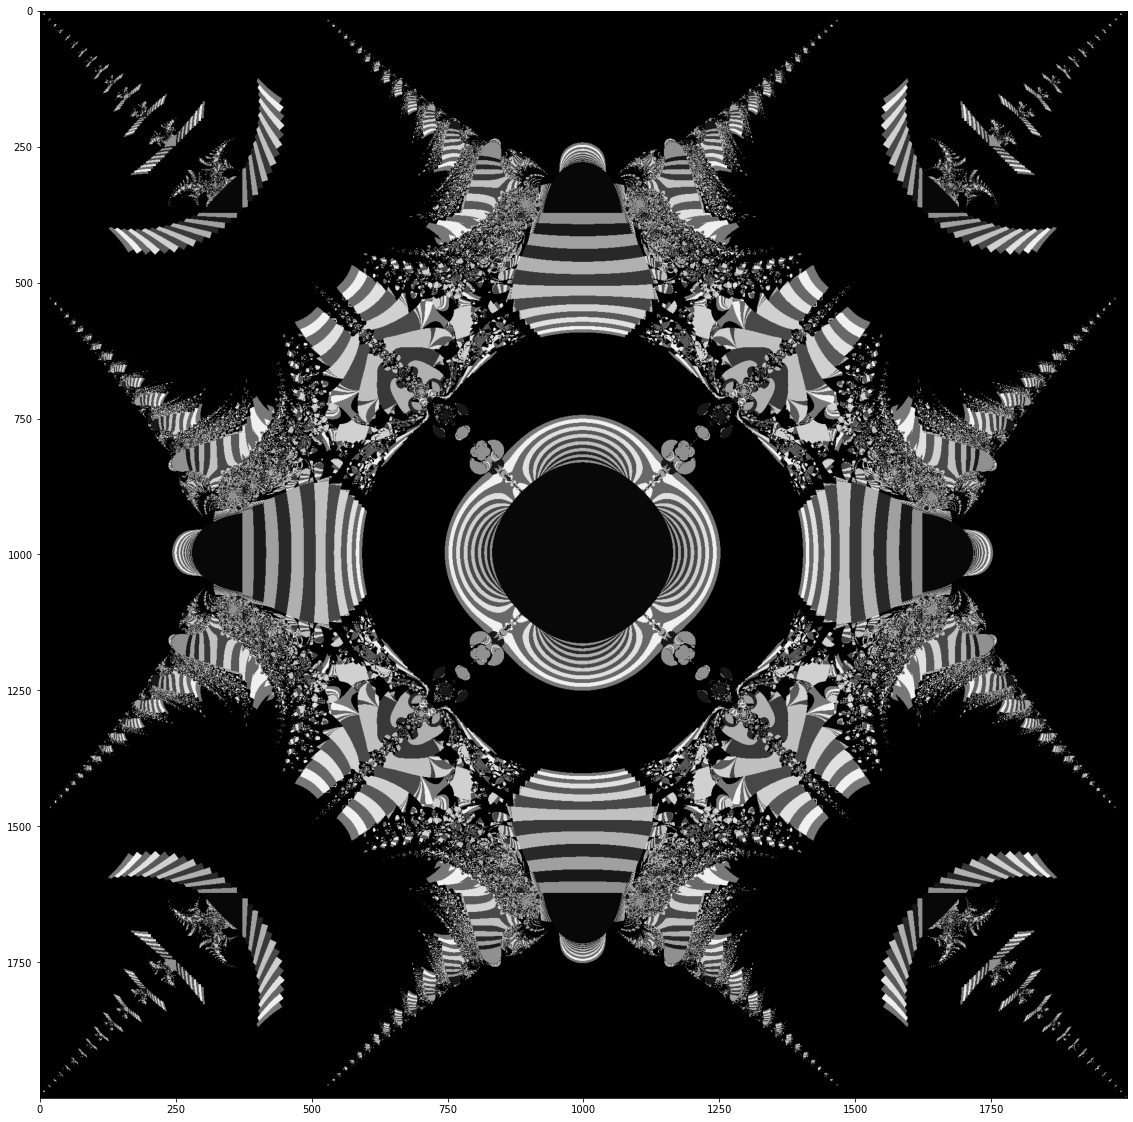

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline 

input_folder = '/content/gdrive/MyDrive/Colab Notebooks/images/mandel'

image_list = [Image.open(name) for name in glob.glob(input_folder + '/*.png')]

def show(img, figsize=(20, 20), title=None):
  plt.figure(figsize=figsize)
  plt.imshow(img)
  if title:
    plt.title(title)
  plt.show()

print(image_list)

show(image_list[-1])

In [44]:
binary_samples = np.array([sample.getdata() for sample in image_list])

In [55]:
print(binary_samples[0])
print(len(binary_samples))

[[  0   0   0 255]
 [216 216 216 255]
 [216 216 216 255]
 ...
 [208 208 208 255]
 [  0   0   0 255]
 [  0   0   0 255]]
11


In [69]:
new_samples = binary_samples.reshape(len(image_list), 2000, 2000, 4)

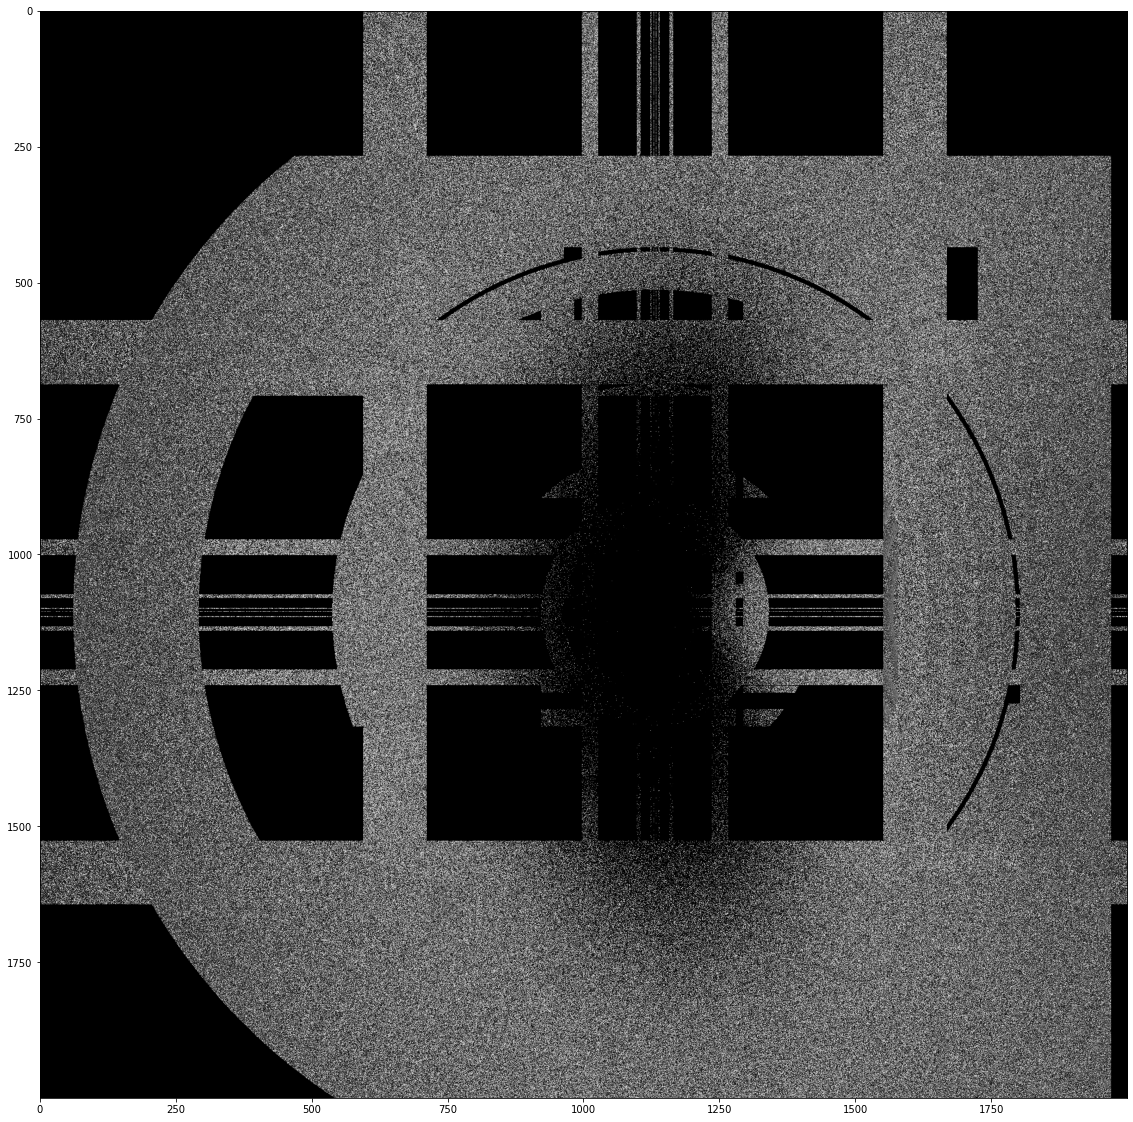

In [71]:
show(new_samples[2])

In [75]:
classes = np.array([0 for _ in range(11)]).reshape(-1)
print(classes)

[0 0 0 0 0 0 0 0 0 0 0]


In [81]:
xfile = 'fractals_x_test.npy'
yfile = 'fractals_y_test.npy'
np.save(xfile, new_samples)
np.save(yfile, classes)

In [82]:
x_test = np.load(xfile)
y_test = np.load(yfile)
x_test.shape, y_test.shape

((11, 2000, 2000, 4), (11,))

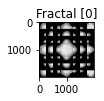

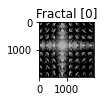

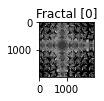

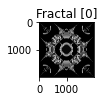

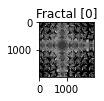

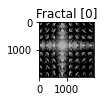

In [84]:
for i in np.random.randint(x_test.shape[0], size=6):
    show(x_test[i], title=f'Fractal [{y_test[i]}]', figsize=(1,1))